# Housing Price Prediction

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
housing_data_test = pd.read_csv("test.csv")
housing_data_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [26]:
housing_data_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 1. Feature Engineering

### a) Removing missing/null values

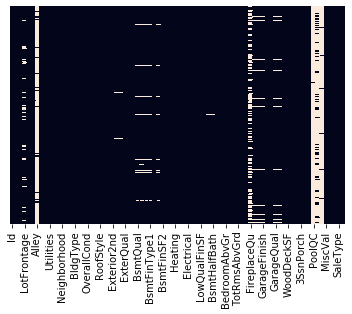

In [27]:
sns.heatmap(housing_data_test.isnull(), yticklabels=False, cbar=False)

In [28]:
def remove_columns(data):
    X = list(data.isnull().sum())
    columns_to_remove = []
    for i in range(len(X)):
        if (X[i]/data.shape[0])>0.3: #removing the columns that have more than 30% missing values
            columns_to_remove.append(data.columns[i])
    return columns_to_remove

drop_columns = remove_columns(housing_data_test)
print("The following columns have more than 30% missing/null values and therefore should be dropped:")
for column in drop_columns:
    print(column)

The following columns have more than 30% missing/null values and therefore should be dropped:
Alley
FireplaceQu
PoolQC
Fence
MiscFeature


In [29]:
#dropping the columns
for column in drop_columns:
    housing_data_test.drop([column], axis=1, inplace=True)
housing_data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


##### Replace other missing values in the columns with respect to their data type
#####       i.e if it is a category label -> replace with mode
#####      if it is a value count -> replcae with mean


In [30]:
null_columns = list(housing_data_test.isnull().sum())
column_names = list(housing_data_test.columns)
print("The respective columns still have null values:")
for i in range(len(list(null_columns))):
    if null_columns[i]!=0:
        print(column_names[i])

The respective columns still have null values:
MSZoning
LotFrontage
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
SaleType


In [31]:
def replace(data, column, operator='mean'):
    if operator == "mode":
        return data[column].fillna(data[column].mode()[0])
        
    return data[column].fillna(data[column].mode()[0])

In [32]:
housing_data_test["LotFrontage"] = replace(housing_data_test, "LotFrontage")
housing_data_test["MasVnrType"] = replace(housing_data_test, "MasVnrType", "mode")
housing_data_test["MasVnrArea"] = replace(housing_data_test, "MasVnrArea")
housing_data_test["BsmtCond"] = replace(housing_data_test, "BsmtCond", "mode")
housing_data_test["BsmtQual"] = replace(housing_data_test, "BsmtQual", "mode")
housing_data_test["GarageType"] = replace(housing_data_test, "GarageType", "mode")
housing_data_test["GarageFinish"] = replace(housing_data_test, "GarageFinish", "mode")
housing_data_test["GarageQual"] = replace(housing_data_test, "GarageQual", "mode")
housing_data_test["GarageCond"] = replace(housing_data_test, "GarageCond", "mode")
housing_data_test["GarageYrBlt"] = replace(housing_data_test, "GarageYrBlt", "mode")
housing_data_test["BsmtExposure"] = replace(housing_data_test, "BsmtExposure", "mode")
housing_data_test["BsmtFinType1"] = replace(housing_data_test, "BsmtFinType1", "mode")
housing_data_test["BsmtFinType2"] = replace(housing_data_test, "BsmtFinType2", "mode")
housing_data_test["Electrical"] = replace(housing_data_test, "Electrical", "mode")
housing_data_test["MSZoning"] = replace(housing_data_test, "MSZoning")
housing_data_test["Utilities"] = replace(housing_data_test, "Utilities")
housing_data_test["Exterior1st"] = replace(housing_data_test, "Exterior1st")
housing_data_test["Exterior2nd"] = replace(housing_data_test, "Exterior2nd")
housing_data_test["BsmtFinSF1"] = replace(housing_data_test, "BsmtFinSF1")
housing_data_test["BsmtFinSF2"] = replace(housing_data_test, "BsmtFinSF2")
housing_data_test["BsmtUnfSF"] = replace(housing_data_test, "BsmtUnfSF")
housing_data_test["TotalBsmtSF"] = replace(housing_data_test, "TotalBsmtSF")
housing_data_test["BsmtFullBath"] = replace(housing_data_test, "BsmtFullBath")
housing_data_test["BsmtHalfBath"] = replace(housing_data_test, "BsmtHalfBath")
housing_data_test["KitchenQual"] = replace(housing_data_test, "KitchenQual")
housing_data_test["Functional"] = replace(housing_data_test, "Functional")
housing_data_test["GarageCars"] = replace(housing_data_test, "GarageCars")
housing_data_test["GarageArea"] = replace(housing_data_test, "GarageCars")
housing_data_test["SaleType"] = replace(housing_data_test, "SaleType")

In [33]:
housing_data_test.drop(["Id"], axis=1, inplace=True)

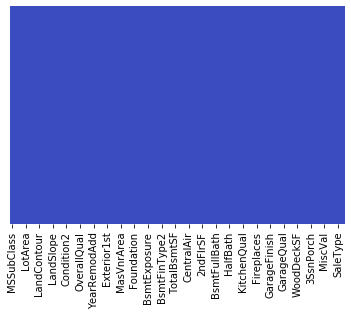

In [34]:
sns.heatmap(housing_data_test.isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

In [35]:
len(list(np.unique(housing_data_test["MSZoning"])))

5

In [36]:
column_names = list(housing_data_test.columns)
categorical_columns = []
count=0
for name in column_names:
    if housing_data_test[name].dtype==object:
        categorical_columns.append([name, np.unique(housing_data_test[name])])
        count+=1

In [38]:
housing_data_test.to_csv("test2.csv", index=False)